<a href="https://colab.research.google.com/github/Jamakasilwane/EDSA_Zindi_Hackathon/blob/master/EDSA_Zindi_Hackathon_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDSA-Zindi Hackathon Notebook**

# Introduction

The following is the machine Learning problem from the Sendy Logistics Challenge from one of the Zindi hosted hackathons. Zindi is the platform that hosts several or different Machine Learning Hackathons around the Africa Continent and with Sendy Logistics this Machine learning Hackathon is for the EDSA Explore Data-Science Academy Students that are currently enrolled for 2020 Academic Year.

Sendy Logistics Company helps Clients/Customers to trade easily, deliver more competetive and build extraordinary businesses by transporting different kind of packages or deliveries from one point to another point efficiently. This Machine Learning problem is to solve the efficiency of Sendy's services and to better communication to the customers.

The Machine Learning Challenge hosted on Zindi by Sendy is detailed as following : 

Each Team or Student from EDSA Explore Data-Science Academy should build a Machine Learning model that predict the estimated time it will take the delivery of the order to arrive from the point of pickup to the arrival destination.



# Data Preprocessing

## Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

## Importing the dataset

The following is the imported Data for Training the Machine Learning Model to predict the estimated time a delivery will take from one point to another point with full detail of each Dataset :

1. Train.csv { Dataset that contains all the variables that should be used to train the model to predict the estimated time. }
2. Test.csv  { Dataset that contains variables that will be used to test the model's accuracy in predicting the estimated time. }
3. SampleSubmission.csv {Sample of the Submission's expectation of the model trained for this Machine Learning problem. }
4. variableDefinitions.csv  {Dataset that contains all the definition of the whole data provided in details and gives more clarity of the data. }


In [0]:
dataset_train = pd.read_csv("https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/Train.csv")
dataset_test = pd.read_csv("https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/Test.csv")
dataset_sample = pd.read_csv("https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/SampleSubmission.csv")
var = pd.read_csv('https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/VariableDefinitions.csv')

## Data Cleaning and Formatting

The following section looks at information which pertains to both the training and testing datasets. It looks at the columns data types as check whether they correspond with what each column shows. We also Check for missig values in the datasets. 

In [54]:
dataset_train.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [55]:
#Checking the dataset_train information
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [56]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

Looking at the datasets information, there are few data types which are incorrectly formatted. This includes:

*   Placement - Time
*   Confirmation - Time
*   Arrival at Pickup - Time
*   Pickup - Time

 

### Changing Time Columns Types Into Datetime

The aforementioned columns above should be in a datetime format but they have been declared as object types. The function below converts all type columns into the correct type format (datetime).

In [0]:
#changing the data type of columns containing Time in the both train & test dataset
data = dataset_train.iloc[:,:-2].columns
for col in list(data):
    if 'Time' in col:
        dataset_train[col] = pd.to_datetime(dataset_train[col])
for col in list(dataset_test):
    if 'Time' in col:
        dataset_test[col] = pd.to_datetime(dataset_test[col])      

### Checking for missing values

Since we now have the correct format of all the data types in the training data set, we then start to analyse the information variables containing numeric values. This includes checking for missing values and their percentage (%). From the data below, 'Temperature' and 'Precipitation in millimeters' columns have the the highest missing values in both datasets with 20% and 97.40% respectively.

In [58]:
#looking at the missing values in each column
dataset_train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [59]:
#Checking the percetage of the missing values
round(dataset_train[['Temperature','Precipitation in millimeters']].isnull().sum()*100/len(dataset_train),2)

Temperature                     20.59
Precipitation in millimeters    97.40
dtype: float64

## Exploratory Data Analysis

Exploratory Data Analysis is the most important part in both Supervised and Unsupervised Machine Learning. Our eyes can draw few insights by looking at the details of the data provided in the form of the Table or Text file or Sequence File. Although that only gives us the overview of the Ground Truth of the provided data,thus that is why Exploratory Data Analysis is very important. It makes us to look deep in the data provided using different kind of data representations. We get to compare Variables/Columns of the Data provided and also get to plot different Graphs to visualize between certain Variables or visualize the Variable on it own.

In the following Section we will be looking deep on certain Variables and intuively deciding on Variables to use for training our model for the predictions. We start by looking at the Statistics Description of the few Variables.

In [60]:
#checking the statistics description for the training dataset
round(dataset_train.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.75,0.63,1.00,3.00,3.00,3.00,4.00
Placement - Day of Month,21201.0,15.65,8.80,1.00,8.00,15.00,23.00,31.00
Placement - Weekday (Mo = 1),21201.0,3.24,1.57,1.00,2.00,3.00,5.00,7.00
Confirmation - Day of Month,21201.0,15.65,8.80,1.00,8.00,15.00,23.00,31.00
Confirmation - Weekday (Mo = 1),21201.0,3.24,1.57,1.00,2.00,3.00,5.00,7.00
Arrival at Pickup - Day of Month,21201.0,15.65,8.80,1.00,8.00,15.00,23.00,31.00
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.24,1.57,1.00,2.00,3.00,5.00,7.00
Pickup - Day of Month,21201.0,15.65,8.80,1.00,8.00,15.00,23.00,31.00
Pickup - Weekday (Mo = 1),21201.0,3.24,1.57,1.00,2.00,3.00,5.00,7.00
Arrival at Destination - Day of Month,21201.0,15.65,8.80,1.00,8.00,15.00,23.00,31.00


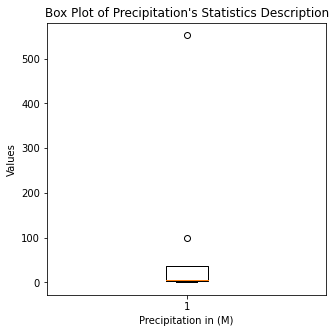

In [61]:
#box whisker plot of the Precipitation column using Statistic Summary
figsize(5, 5)
plt.title("Box Plot of Precipitation's Statistics Description")
plt.boxplot(dataset_train['Precipitation in millimeters'].describe())
plt.xlabel('Precipitation in (M)')
plt.ylabel('Values')
plt.show()

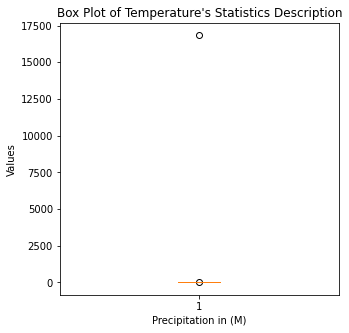

In [63]:
#box whisker plot of the Temperature column using Statistic Summary
figsize(5, 5)
plt.title("Box Plot of Temperature's Statistics Description")
plt.boxplot(dataset_train['Temperature'].describe())
plt.xlabel('Precipitation in (M)')
plt.ylabel('Values')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


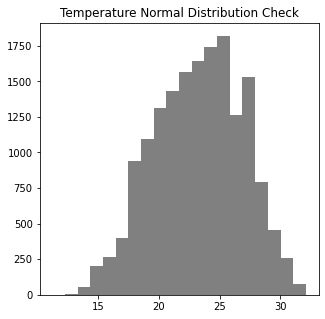

In [66]:
plt.hist(dataset_train['Temperature'],color='grey', bins=20)
plt.title('Temperature Normal Distribution Check')
plt.show()

The mean temperature at the time of order placement is 25 Degrees Celsius 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


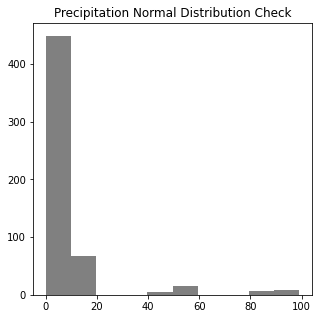

In [65]:
plt.hist(dataset_train['Precipitation in millimeters'], color='grey', density=False, bins=10)
plt.title("Precipitation Normal Distribution Check")
plt.show()

The most common level of precipitation at the time of order placement was less than 20ml

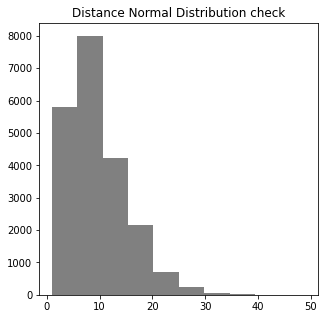

In [67]:
plt.hist(dataset_train['Distance (KM)'], color='grey', bins=10)  
plt.title("Distance Normal Distribution check")
plt.show()

The longest distance from  from Pickup to Destination is 10Km 

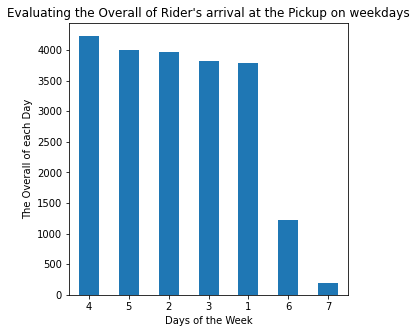

In [68]:
dataset_train['Arrival at Pickup - Weekday (Mo = 1)'].value_counts().plot(kind='bar',rot=0)
plt.title("Evaluating the Overall of Rider's arrival at the Pickup on weekdays")
plt.xlabel("Days of the Week")
plt.ylabel("The Overall of each Day")
plt.show()

From the Arrival at Pickup graph, it is evident that Most dirvers arrive at the loaction of the pickup during weekdays compared to weekends. consequently, It can be deduced that  weekends are not busy compared to weekddays

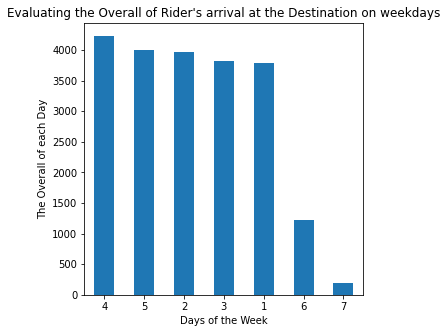

In [69]:
dataset_train['Arrival at Destination - Weekday (Mo = 1)'].value_counts().plot(kind='bar',rot=0)
plt.title("Evaluating the Overall of Rider's arrival at the Destination on weekdays")
plt.xlabel("Days of the Week")
plt.ylabel("The Overall of each Day")
plt.show()

The Arrival at Destination graph shows that deliveries tend to reach the denstination during weekdays with Thursday being the most frequent day. 

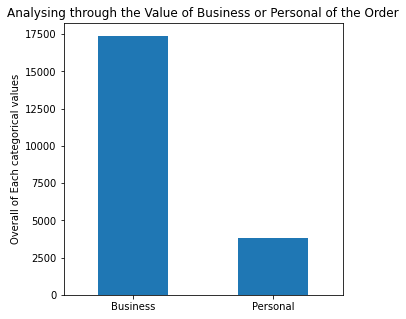

In [70]:
dataset_train['Personal or Business'].value_counts().plot(kind='bar',rot=0)
plt.title('Analysing through the Value of Business or Personal of the Order')
plt.ylabel("Overall of Each categorical values")
plt.show()

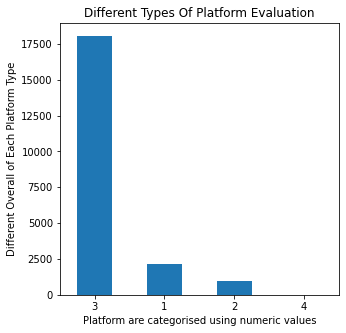

In [71]:
dataset_train['Platform Type'].value_counts().plot(kind='bar',rot=0)
plt.title("Different Types Of Platform Evaluation")
plt.xlabel('Platform are categorised using numeric values')
plt.ylabel('Different Overall of Each Platform Type')
plt.show()

## Encoding Categoric Data 

#### DATETIME COLUMNS

As the Date-time Columns have been correctly formatted to the Date-time data type,We then Extract the Time due to Hours,Minutes & Seconds and Create new columns containing separate of time

In [0]:
#In this section Hours were extracted and added to the dataframe as new columns
#Train
dataset_train['Placement - Hour']=dataset_train['Placement - Time'].dt.hour
dataset_train['Confirmation - Hour']=dataset_train['Confirmation - Time'].dt.hour

dataset_train['Arrival at Pickup - Hour']=dataset_train['Arrival at Pickup - Time'].dt.hour
dataset_train['Pickup - Hour']=dataset_train['Pickup - Time'].dt.hour

#Test
dataset_test['Placement - Hour']=dataset_test['Placement - Time'].dt.hour
dataset_test['Confirmation - Hour']=dataset_test['Confirmation - Time'].dt.hour

dataset_test['Arrival at Pickup - Hour']=dataset_test['Arrival at Pickup - Time'].dt.hour
dataset_test['Pickup - Hour']=dataset_test['Pickup - Time'].dt.hour

In [0]:
#In this section Minutes were extracted and added to the dataframe as new columns
#Train
dataset_train['Placement - Minutes'] = dataset_train['Placement - Time'].dt.minute
dataset_train['Confirmation - Minutes']=dataset_train['Confirmation - Time'].dt.minute

dataset_train['Arrival at Pickup - Minutes']=dataset_train['Arrival at Pickup - Time'].dt.minute
dataset_train['Pickup - Minutes']=dataset_train['Pickup - Time'].dt.minute

#Test
dataset_test['Placement - Minutes']=dataset_test['Placement - Time'].dt.minute
dataset_test['Confirmation - Minutes']=dataset_test['Confirmation - Time'].dt.minute

dataset_test['Arrival at Pickup - Minutes']=dataset_test['Arrival at Pickup - Time'].dt.minute
dataset_test['Pickup - Minutes']=dataset_test['Pickup - Time'].dt.minute

In [0]:
#In this section Seconds were extracted and added to the dataframe as new columns
#Train
dataset_train['Placement - Seconds']=dataset_train['Placement - Time'].dt.second
dataset_train['Confirmation - Seconds']=dataset_train['Confirmation - Time'].dt.second

dataset_train['Arrival at Pickup - Seconds']=dataset_train['Arrival at Pickup - Time'].dt.second
dataset_train['Pickup - Seconds']=dataset_train['Pickup - Time'].dt.second

### Test
dataset_test['Placement - Seconds']=dataset_test['Placement - Time'].dt.second
dataset_test['Confirmation - Seconds']=dataset_test['Confirmation - Time'].dt.second

dataset_test['Arrival at Pickup - Seconds']=dataset_test['Arrival at Pickup - Time'].dt.second
dataset_test['Pickup - Seconds']=dataset_test['Pickup - Time'].dt.second

#### Platform Type

For the Platform type Column We then get to change it to the dummy variables to have a cleared and measurable feature for the model. We then encode dummy to new columns

In [0]:
#Dummy encoding of the 'Platform Type' column:
#TRAIN
dataset_train['Platform Type'] = dataset_train['Platform Type'].astype('category')
dataset_train = pd.concat([dataset_train.drop(columns=['Platform Type']), pd.get_dummies(dataset_train['Platform Type'])], axis=1)

#TEST 
dataset_test['Platform Type'] = dataset_test['Platform Type'].astype('category')
dataset_test = pd.concat([dataset_test.drop(columns=['Platform Type']), pd.get_dummies(dataset_test['Platform Type'])], axis=1)

In [0]:
#Renaming the 'platform type' columns
dataset_train.rename(columns={1: "Platform Type 1", 2: "Platform Type 2", 3: "Platform Type 3", 4: "Platform Type 4"}, inplace=True)
dataset_test.rename(columns={1: "Platform Type 1", 2: "Platform Type 2", 3: "Platform Type 3", 4: "Platform Type 4"}, inplace=True)

#### Personal or Business

In [0]:
#Dummy encoding of the 'Personal or Business' column
#Train
dataset_train['Personal or Business'] = dataset_train['Personal or Business'].astype('category')
dataset_train = pd.concat([dataset_train.drop(columns=['Personal or Business']), pd.get_dummies(dataset_train['Personal or Business'])], axis=1)

#Test
dataset_test['Personal or Business'] = dataset_test['Personal or Business'].astype('category')
dataset_test = pd.concat([dataset_test.drop(columns=['Personal or Business']), pd.get_dummies(dataset_test['Personal or Business'])], axis=1)

In [0]:
#Renaming the 'Personal or Business' columns
dataset_train.rename(columns={0: "Business", 1: "Personal"}, inplace=True)
dataset_test.rename(columns={0: "Business", 1: "Personal"}, inplace=True)

## Selecting columns to be used for model training and testing 

Following is the List of Features we're manually excluding from the features that will be used for training the model and also for testing due to our EDA evaluations

In [0]:
#features we eill use for the model training dataset for X_train
X1 = dataset_train.loc[:,['Order No','Distance (KM)','Temperature','Precipitation in millimeters',
                          'Platform Type 1', 'Platform Type 2','Platform Type 3', 'Platform Type 4', 
                          'Business', 'Personal','Placement - Hour', 'Confirmation - Hour',
                          'Arrival at Pickup - Hour','Pickup - Hour', 'Placement - Minutes',
                          'Confirmation - Minutes','Arrival at Pickup - Minutes', 'Pickup - Minutes',
                          'Placement - Seconds', 'Confirmation - Seconds','Arrival at Pickup - Seconds', 'Pickup - Seconds']]

#the Y_train data set
Y_train = dataset_train.loc[:,['Time from Pickup to Arrival']].values

#features we will use for the model testing dataset for X_test
X2 = dataset_test.loc[:,['Order No','Distance (KM)','Temperature','Precipitation in millimeters',
                        'Platform Type 1', 'Platform Type 2','Platform Type 3', 'Platform Type 4',
                        'Business', 'Personal','Placement - Hour', 'Confirmation - Hour', 
                        'Arrival at Pickup - Hour','Pickup - Hour', 'Placement - Minutes',
                        'Confirmation - Minutes','Arrival at Pickup - Minutes', 'Pickup - Minutes','Placement - Seconds',
                        'Confirmation - Seconds','Arrival at Pickup - Seconds', 'Pickup - Seconds']]

Y_test = dataset_sample.iloc[:,-1].values

In [0]:
#changing the Index for both X_train & X_test Dataframes to be Order No and convert the Dataframes to Numpy arrays
X_train = X1.set_index('Order No').values
X_test = X2.set_index('Order No').values

In [84]:
X_train

array([[ 4. , 20.4,  nan, ..., 10. , 47. , 30. ],
       [16. , 26.4,  nan, ..., 21. , 22. ,  9. ],
       [ 3. ,  nan,  nan, ..., 44. , 34. ,  3. ],
       ...,
       [20. , 29.2,  nan, ...,  9. , 17. , 52. ],
       [13. , 15. ,  nan, ..., 53. , 59. , 15. ],
       [12. , 30.9,  nan, ...,  1. , 29. , 55. ]])

## Taking care of missing values in the data sets

Taking care of missing values regarding the other features

In [0]:
#The missing values of temperature and Precipitation in millimeters have been replaced with the most frequent values
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X_train[:,1:3],X_test[:,1:3])
X_train[:,1:3] = imputer.transform(X_train[:,1:3])
X_test[:,1:3] = imputer.transform(X_test[:,1:3])

In [87]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,4.0,20.4,2.0,0.0,0.0,1.0,0.0,1.0,0.0,9.0,9.0,10.0,10.0,35.0,40.0,4.0,27.0,46.0,10.0,47.0,30.0
1,16.0,26.4,2.0,0.0,0.0,1.0,0.0,0.0,1.0,11.0,11.0,11.0,11.0,16.0,23.0,40.0,44.0,16.0,21.0,22.0,9.0
2,3.0,24.7,2.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,12.0,12.0,12.0,39.0,42.0,49.0,53.0,25.0,44.0,34.0,3.0
3,9.0,19.2,2.0,0.0,0.0,1.0,0.0,1.0,0.0,9.0,9.0,9.0,9.0,25.0,26.0,37.0,43.0,34.0,5.0,56.0,6.0
4,9.0,15.4,2.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0,9.0,10.0,10.0,55.0,56.0,3.0,5.0,18.0,18.0,53.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,3.0,28.6,2.0,0.0,0.0,1.0,0.0,0.0,1.0,15.0,15.0,15.0,16.0,54.0,55.0,58.0,20.0,38.0,9.0,49.0,8.0
21197,7.0,26.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,10.0,10.0,10.0,10.0,13.0,13.0,20.0,33.0,34.0,41.0,4.0,27.0
21198,20.0,29.2,2.0,0.0,0.0,1.0,0.0,1.0,0.0,17.0,17.0,17.0,17.0,6.0,7.0,30.0,50.0,16.0,9.0,17.0,52.0
21199,13.0,15.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0,9.0,9.0,9.0,31.0,31.0,38.0,45.0,39.0,53.0,59.0,15.0


## Feature Scaling of the training and test data set

In [0]:

sc = StandardScaler()
X_train[:,:] = sc.fit_transform(X_train[:,:])
X_test[:,:] = sc.transform(X_test[:,:])

# Training the Individual Models

## Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
beta_0 = float(regressor.intercept_)

In [90]:
print(beta_0)

372.4547588395651


In [0]:
#predicting y using the X_test
y_pred = regressor.predict(X_test)

In [92]:
#comparing the y_pred with the actual Y values
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1373.35  567.  ]
 [1213.99 4903.  ]
 [ 954.6  5649.  ]
 ...
 [1665.01     nan]
 [2604.55     nan]
 [1504.19     nan]]


In [0]:
#create a dataframe containing the expected outputs for Submission
x = pd.DataFrame(y_pred)
x = round(x,2)
X2['Time from Pickup to Arrival'] = x
predicted = X2[['Order No','Time from Pickup to Arrival']]

In [0]:
Y_test1 = pd.DataFrame(Y_test).fillna(0)

In [0]:
from sklearn import metrics
#Testing using  Y_test from the testingng Data 
#print("Testing:")
#print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
#print('R_squared:', metrics.r2_score(Y_test, y_pred))

In [97]:
print("RMSE: ", np.sqrt(mean_squared_error(Y_test1,y_pred)))

RMSE:  1663.4683945964096


In [98]:
predicted

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1373.35
1,Order_No_12736,1213.99
2,Order_No_768,954.60
3,Order_No_15332,1023.40
4,Order_No_21373,1221.48
...,...,...
7063,Order_No_3612,1012.22
7064,Order_No_7657,2971.00
7065,Order_No_1969,1665.01
7066,Order_No_10591,2604.55


In [0]:
#save the results as the .csv file
predicted.to_csv('predicted_time.csv',index=False)

## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor
regr_tree = DecisionTreeRegressor(max_depth=3)

In [101]:
regr_tree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
y_pred1 = regr_tree.predict(X_test)

In [105]:
print("RMSE: ", np.sqrt(mean_squared_error(Y_test1,y_pred1)))

RMSE:  1656.9189779802261


Lasso regression

In [106]:
# Importing the model class
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4079777973.31506, tolerance: 2066371.650150738
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [107]:
beta_2 = float(lasso.intercept_)
print(beta_2)

427.644476176685


In [0]:
y_pred2 = lasso.predict(X_test)

In [111]:
from sklearn import metrics
#Calculate the Root-Mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test1, y_pred2)))


Root Mean Squared Error: 1663.2603441630274


## Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 3 in this example
RF = RandomForestRegressor(n_estimators=10,criterion='mae', max_depth=3,random_state=0)
RF.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [114]:
from sklearn.metrics import mean_squared_error
# Get predictions
y_pred_RF = RF.predict(X_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(Y_test1,y_pred_RF)))
print("MSE:",mean_squared_error(Y_test1,y_pred_RF))

RMSE: 1503.5231942662037
MSE: 2260581.9956964487


In [0]:
# Saving the trained model as .pkl file

In [0]:
model_save_path = "trained_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(regressor,file)